<a href="https://colab.research.google.com/github/kayleepho/MATH-5750-Project-1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

**Problem 952**

Given a prime $p$ and a positive integer $n < p$, let $R(p, n)$ be the **multiplicative order** of $p$ molulo $n!$

In other words, $R(p, n)$ is the minimal positive integer $r$ such that $$p^r \equiv 1 \pmod{n!}$$

For example, $R(7, 4) = 2$ and $R(10^9 + 7, 12) = 17280$.

Find $R(10^9 + 7, 10^7)$. Give your answer modulo $10^9 + 7$





In [36]:
import math
from array import array
from collections import defaultdict

In [42]:
# Step 1: Prime Sieve for smallest prime factors
def sieve_spf(limit):
    spf = array('I', [0]) * (limit + 1)
    primes = []
    for i in range(2, limit+1):
        if spf[i] == 0:
            spf[i] = i
            primes.append(i)
        for pr in primes:
            v = i * pr
            if v > limit:
                break
            spf[v] = pr
            if pr == spf[i]:
                break
    return primes, spf

In [38]:
# Step 2: Factorize x with smallest prime factor (SPF) if possible, else trial division
def factorize_with_spf(x, primes, spf):
    res = {}
    if x <= 1: #it has no prime factors
      return res
    limit = len(spf) - 1
    if x <= limit:
        while x > 1:
            p = spf[x]
            cnt = 0
            while x % p == 0:
                x //= p
                cnt += 1
            res[p] = res.get(p,0) + cnt
        return res
    # fallback trial division
    for pr in primes:
        if pr*pr > x:
          break
        if x % pr == 0:
            cnt = 0
            while x % pr == 0:
                x //= pr
                cnt += 1
            res[pr] = cnt
    if x > 1:
        res[x] = res.get(x,0) + 1
    return res

In [51]:
# Exponent of prime q dividing x
def v_q_of(x, q):
    cnt = 0
    while x % q == 0 and x > 0:
        x //= q
        cnt += 1
    return cnt

# Multiplicative order of p mod prime q
def order_mod_prime(p, q, primes, spf):
    phi = q - 1
    fac = factorize_with_spf(phi, primes, spf)
    d = phi
    for pr in sorted(fac.keys()):
        while d % pr == 0 and pow(p, d//pr, q) == 1:
            d //= pr
    return d

In [48]:
# Multiplicative order of p modulo q^e
def order_mod_prime_power(p, q, e, primes, spf):
    if q == 2:
        d = 1 if pow(p,1,4) == 1 else 2
        val = pow(p, d) - 1
        k0 = v_q_of(val, 2)
        if e <= k0:
            return d
        else:
            return d * (2 ** (e - k0))
    else:
        d = order_mod_prime(p, q, primes, spf)
        # compute q-adic valuation of p^d - 1
        k0 = 0
        mod = q
        while True:
            mod *= q
            if pow(p, d, mod) == 1:
                k0 += 1
                if k0 >= e: break
            else:
                break
        if e <= k0:
            return d
        else:
            return d * (q ** (e - k0))

In [49]:
def compute_R_mod_p(p, n, primes, spf, debug=False):
    max_exp = defaultdict(int)
    for q in primes:
        if q > n: break
        # exponent of q in n! (Legendre)
        e = 0
        t = q
        while t <= n:
            e += n // t
            t *= q
        if e == 0: continue
        ord_qe = order_mod_prime_power(p, q, e, primes, spf)
        f = factorize_with_spf(ord_qe, primes, spf)
        for pr, ex in f.items():
            if ex > max_exp[pr]:
                max_exp[pr] = ex
        if debug:
            print(f"q={q}, e={e}, ord(q^e)={ord_qe}, factors={f}")
    result = 1
    for pr, ex in sorted(max_exp.items()):
        result = (result * pow(pr, ex, p)) % p
    return result

In [52]:
# Small test
p = 10**9 + 7
n = 12
primes, spf = sieve_spf(n)
res12 = compute_R_mod_p(p, n, primes, spf, debug=True)
print("\nComputed R(10^9+7, 12) mod p =", res12)

# Brute force check on 12!
mod12fact = math.factorial(12)
r = 1
while pow(p, r, mod12fact) != 1:
    r += 1
print("Brute force R(10^9+7, 12) =", r)

# Problems
N = 10**5
primes, spf = sieve_spf(N)
answer = compute_R_mod_p(p, N, primes, spf, debug=False)
print("R(10^9+7, 10^5) mod (10^9+7) =", answer)

N = 10**7  #This is a large number so it took long time to run
primes, spf = sieve_spf(N)
answer = compute_R_mod_p(p, N, primes, spf, debug=False)
print("R(10^9+7, 10^7) mod (10^9+7) =", answer)

q=2, e=10, ord(q^e)=128, factors={2: 7}
q=3, e=5, ord(q^e)=162, factors={2: 1, 3: 4}
q=5, e=2, ord(q^e)=20, factors={2: 2, 5: 1}
q=7, e=1, ord(q^e)=14, factors={2: 1, 7: 1}
q=11, e=1, ord(q^e)=110, factors={2: 1, 5: 1, 11: 1}

Computed R(10^9+7, 12) mod p = 3991680
Brute force R(10^9+7, 12) = 17280
R(10^9+7, 10^5) mod (10^9+7) = 687288352


KeyboardInterrupt: 

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [56]:
# Set up Linear Regression and explore other regression methods on this dataset
# Standardize Features (for Ridge/Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1).fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)


In [58]:
# Function to calculate metrics
def model_metrics(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

# --- Compare Models ---
metrics = pd.DataFrame({
    "Linear": model_metrics(y_test, y_pred_lr),
    "Ridge": model_metrics(y_test, y_pred_ridge),
    "Lasso": model_metrics(y_test, y_pred_lasso)
}).T
metrics

,RMSE,MAE,R2
Linear,0.727313,0.535126,0.594323
Ridge,0.727321,0.535128,0.594314
Lasso,0.830684,0.627215,0.470813


In [60]:
# --- Sort coefficients by importance ---
coef_table = coef_table.sort_values(by="Coefficient", key=abs, ascending=False)

print("\nThe most important predictor variables:\n")
coef_table


The most important predictor variables:



,Feature,Coefficient
3,AveBedrms,0.593215
7,Longitude,-0.434166
0,MedInc,0.433333
6,Latitude,-0.421449
2,AveRooms,-0.098643
1,HouseAge,0.009293
5,AveOccup,-0.004745
4,Population,-0.000008


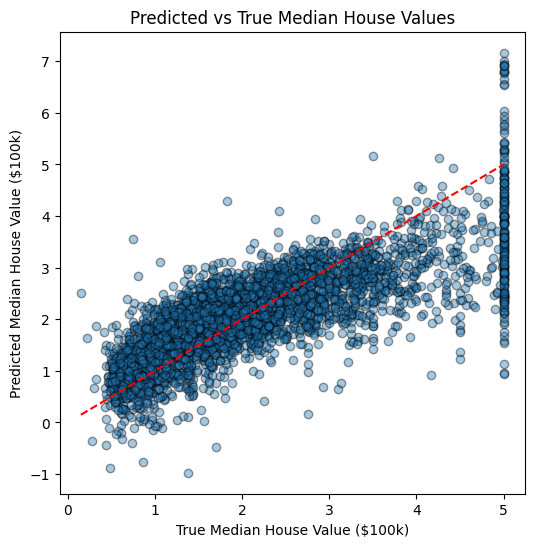

In [64]:
# Scatterplot of the predicted vs. true median house values (Linear Regression) ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.4, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("True Median House Value ($100k)")
plt.ylabel("Predicted Median House Value ($100k)")
plt.title("Predicted vs True Median House Values")
plt.show()

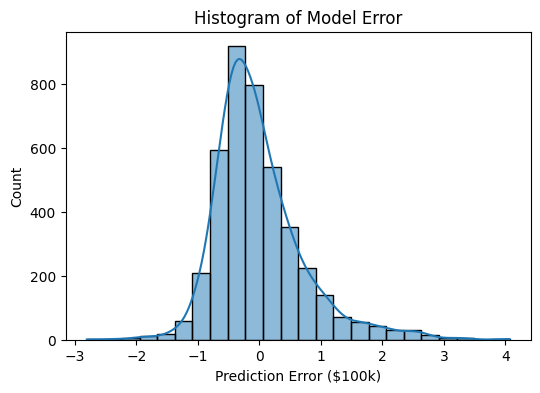

In [65]:
# Histogram of model error (Linear Regression)
errors = y_test - y_pred_lr
plt.figure(figsize=(6,4))
sns.histplot(errors, bins=24, kde=True)
plt.xlabel("Prediction Error ($100k)")
plt.title("Histogram of Model Error")
plt.show()

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, PrecisionRecallDisplay)

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# Support vector machines (SVM) with RBF kernel
svm_clf = SVC(kernel='rbf', probability=True, random_state=0)
svm_clf.fit(X_train_std, y_train)

# Predictions
y_train_pred = svm_clf.predict(X_train_std)
y_test_pred  = svm_clf.predict(X_test_std)
y_train_prob = svm_clf.predict_proba(X_train_std)[:, 1]
y_test_prob  = svm_clf.predict_proba(X_test_std)[:, 1]

In [ ]:
# Metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)
train_roc = roc_auc_score(y_train, y_train_prob)
test_roc  = roc_auc_score(y_test, y_test_prob)
train_ap  = average_precision_score(y_train, y_train_prob)
test_ap   = average_precision_score(y_test, y_test_prob)

# Create a DataFrame for a clean table
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "ROC AUC", "Average Precision"],
    "Train": [train_acc, train_roc, train_ap],
    "Test": [test_acc, test_roc, test_ap]
})

metrics_df

,Metric,Train,Test
0,Accuracy,0.989011,0.964912
1,ROC AUC,0.998266,0.993386
2,Average Precision,0.998841,0.996035


TN: 40, FP: 2, FN: 2, TP: 70


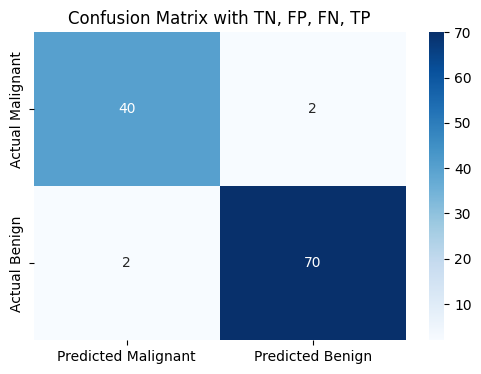

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=[0,1])

# Map to TN, FP, FN, TP
TN, FP, FN, TP = cm.ravel()
print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")

# Create a labeled DataFrame for display
cm_df = pd.DataFrame(
    [[TN, FP],
     [FN, TP]],
    index=['Actual Malignant', 'Actual Benign'],
    columns=['Predicted Malignant', 'Predicted Benign']
)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix with TN, FP, FN, TP")
plt.show()


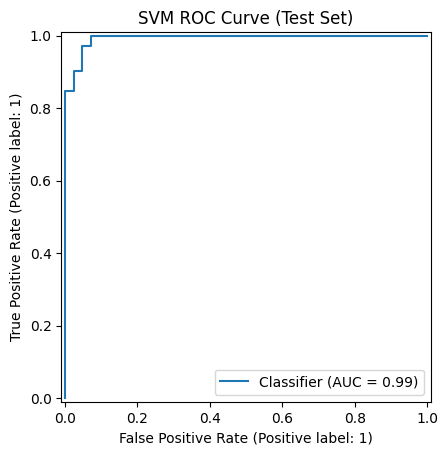

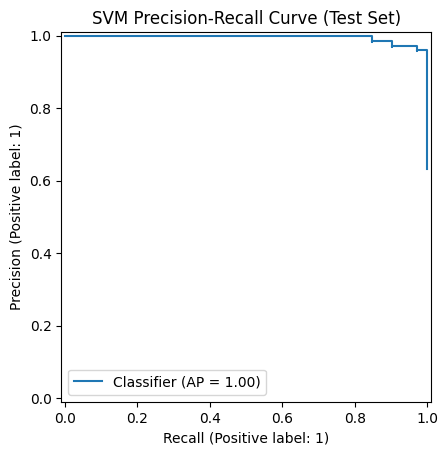

In [ ]:
# ROC curve
RocCurveDisplay.from_predictions(y_test, y_test_prob)
plt.title("SVM ROC Curve (Test Set)")
plt.show()

# Precision-Recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_test_prob)
plt.title("SVM Precision-Recall Curve (Test Set)")
plt.show()


In [ ]:
#Optional

# Random Forest
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_test_rf_prob = rf_clf.predict_proba(X_test)[:, 1]

# Logistic Regression
logreg_clf = LogisticRegression(max_iter=10000, random_state=0)
logreg_clf.fit(X_train_std, y_train)
y_test_log_prob = logreg_clf.predict_proba(X_test_std)[:, 1]


In [ ]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 10 Important Features (Random Forest):")
for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


Top 10 Important Features (Random Forest):
worst perimeter: 0.1530
worst concave points: 0.1277
worst radius: 0.1133
worst area: 0.0921
mean concave points: 0.0905
mean perimeter: 0.0747
mean concavity: 0.0529
area error: 0.0414
mean area: 0.0411
worst concavity: 0.0329


In [ ]:
svm_linear = SVC(kernel='linear', probability=True, random_state=0)
svm_linear.fit(X_train_std, y_train)
coef = svm_linear.coef_[0]
top_idx = np.argsort(np.abs(coef))[::-1][:10]

print("Top 10 Features (Linear SVM):")
for i in top_idx:
    print(f"{feature_names[i]}: {coef[i]:.4f}")


Top 10 Features (Linear SVM):
mean concave points: -0.9673
radius error: -0.9440
worst fractal dimension: -0.9171
worst texture: -0.9082
fractal dimension error: 0.7856
worst concavity: -0.7725
mean concavity: -0.6505
concave points error: -0.6342
worst radius: -0.6289
area error: -0.6119
